In [1]:
import sys
sys.path.append('../src')

from torchvision.transforms import v2
from modules import dataset
import matplotlib.pyplot as plt

/home/lexyo/Dev/cv-proj2/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/lexyo/.config/matplotlib is not a writable directory
Matplotlib created a temporary cache directory at /tmp/matplotlib-9mm1g8_g because there was an issue with the default path (/home/lexyo/.config/matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


/home/lexyo/Dev/cv-proj2/notebooks/../src/modules/paths.py


In [3]:
import importlib
importlib.reload(dataset)
animal_dataset = dataset.load_animal_dataset("train", transform=None)
animal_dataset

Loading animal dataset from /home/lexyo/Dev/cv-proj2/notebooks/../data/animal_train.pkl


(Dataset({
     features: ['image', 'label'],
     num_rows: 29000
 }),
 {'Aquatic': {0, 15, 16, 20, 40},
  'Amphibians & Reptiles': {1, 2, 3, 4, 5},
  'Arthropods': {7, 8, 9, 10, 32, 33, 34, 35, 36, 37, 38, 39, 55},
  'Birds': {17, 18, 19, 42},
  'Mammals': {11,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   41,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   56},
  'Marine Life & Fossils': {6, 12, 13, 14, 57}})

Loading dataset from /home/lexyo/Dev/cv-proj2/notebooks/../data/train.pkl


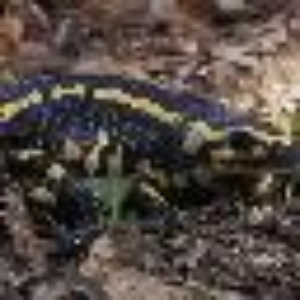

In [6]:
visualize = v2.Compose([v2.ToPILImage(), v2.Resize((300,300), antialias=False)])
image_per_class = dataset.load("train", tiny = True, start=1, stop=5)
visualize(image_per_class[6])["image"]

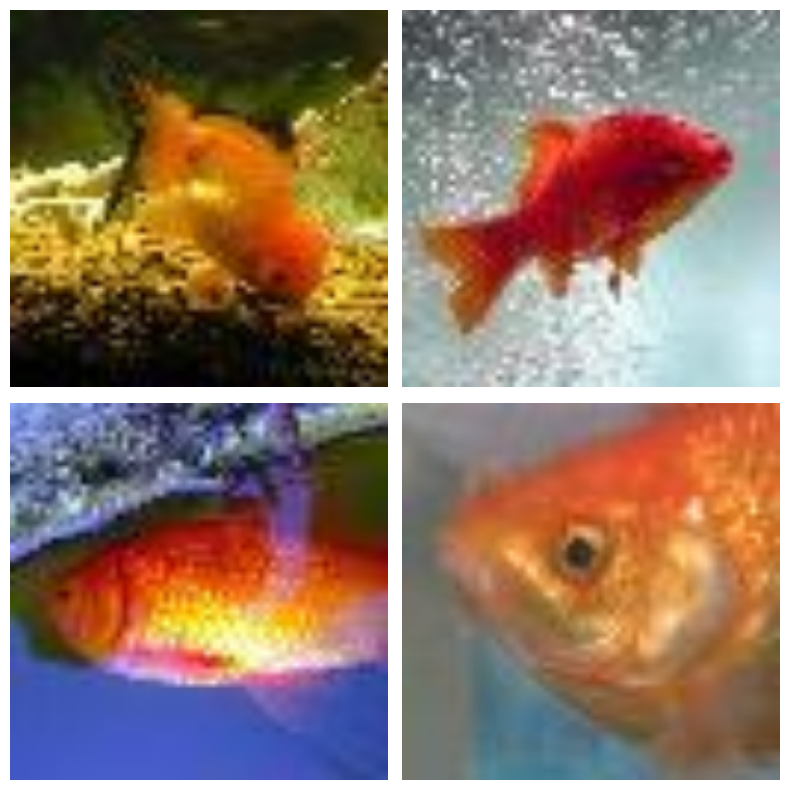

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))  # Adjust figsize as needed

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Display each image in the grid
for i in range(4):
    img = visualize(image_per_class[i])["image"]  # Assuming this returns a PIL Image
    axes[i].imshow(img)
    axes[i].axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()

In [11]:
image_per_class[0:3]

{'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64>],
 'label': [0, 0, 0]}

In [13]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

# Output PDF file
pdf_path = "all_classes_visualized.pdf"

# Create PDF
with PdfPages(pdf_path) as pdf:
    for class_idx in range(200):  # Iterate through all classes
        # Load 4 images for this class (adjust start/stop as needed)
        images = image_per_class[class_idx*4:class_idx*4+4]["image"]
        
        # Create a figure (adjust size to fit PDF page)
        fig = plt.figure(figsize=(8.27, 11.69), dpi=100)  # A4 size (landscape: 11.69, 8.27)
        plt.suptitle(f"Class {class_idx}", fontsize=14, y=0.95)
        
        # Add 2x2 grid of images
        for i in range(4):
            ax = fig.add_subplot(2, 2, i+1)
            img = visualize(images[i])  # Apply your transform
            ax.imshow(img)
            ax.axis("off")
        
        # Adjust layout and save to PDF
        plt.tight_layout(rect=[0, 0, 1, 0.93])  # Leave space for title
        pdf.savefig(fig, bbox_inches="tight")
        plt.close()

print(f"PDF saved to {pdf_path}")

/home/lexyo/Dev/cv-proj2/.venv/lib/python3.12/site-packages/torchvision/transforms/v2/functional/_geometry.py:309: UserWarning: Anti-alias option is always applied for PIL Image input. Argument antialias is ignored.
  warnings.warn("Anti-alias option is always applied for PIL Image input. Argument antialias is ignored.")


PDF saved to all_classes_visualized.pdf


In [7]:
classes = """red fish
salamander
frog 1
frog 2
crocodile
snake
fossil
scorpion
spider
tarantula
centipede
koala
medusa
coral
snail(without shell)
lobster
lobster
Black-necked stork
penguin
albatro
dolphin(?)
yorkshire
golden retriver
labrador
german shepherd
Large poodle
cat 1
cat 2
cat 3
tiger
leon
bear
Ladybugs
cricket
Bacillus rossius
cockroach
mantis
dragonfly
butterfly
leaf butterfly
marine worm
rabbit
pig
cow
buffalo
ovis
darling
gazelle
camel
mokey 1
monkey 2
monkey 3
elephant
red panda
abacus
graduate
altar
backpack
stairs
barber
house
barrel
basketball
bathub
car
lighthouse
becker
beer
bikini
binoculars
bird house
stravagante
geroglyphs
bucket
train modern
meat
holidays
cannon
woman sweater
ATM
CD Player
chest
chirstmas sock
cave
keyboard
candies
car without roof
crane
panorama
monitor
dining table
gym
flag
fly
fountain
train cargo
pan
fluffy jacket
gas mask
go kart
boat
hourglass
smartphone or mp3
cab
giapponesi
lamp
tracotr
coast guard
limousine
compass
child games
soldier
sexy woman
truck
people photo
pillar
flute
organo
parkimeter
public phone
fence
drugs
toilet
ambulance
women clothes
analcholic drink
no idea
rocket
punching bag
fridge?
TV controller
chair
football
sandals
school bus
scoreboard
sewing machine
sub mask
socks
mexican hat
strange machine
spider net
supercar
bridge
chronometer
eye glasses
bridge2
swimming costume
syringe
teapot
teddybear
medieval houses
festival
tractor 2
triumph arc
tram
turnstiles
umbrella
pope
acquedupt
volleyball
water
water cystern
hot pan
spoon
comics
fishing
vegetarian dish?
sweet dish
icecream
duck
playing instrument
party dishes
crauti
plate with food
cabbage
peppers
lemon
fruit
pomegranate
lasagna?
pizza
pie
coffe
bee
kitchen towel
idk
chihuaua
winter panorama
ravine
reef
lake
sea
acorns
cleaning
mushroom
nails
chains
worm
orange"""
classes_stripped = classes.split("\n")
class_to_label = {i:label for i, label in enumerate(classes_stripped)}
print(class_to_label)

{0: 'red fish', 1: 'salamander', 2: 'frog 1', 3: 'frog 2', 4: 'crocodile', 5: 'snake', 6: 'fossil', 7: 'scorpion', 8: 'spider', 9: 'tarantula', 10: 'centipede', 11: 'koala', 12: 'medusa', 13: 'coral', 14: 'snail(without shell)', 15: 'lobster', 16: 'lobster', 17: 'Black-necked stork', 18: 'penguin', 19: 'albatro', 20: 'dolphin(?)', 21: 'yorkshire', 22: 'golden retriver', 23: 'labrador', 24: 'german shepherd', 25: 'Large poodle', 26: 'cat 1', 27: 'cat 2', 28: 'cat 3', 29: 'tiger', 30: 'leon', 31: 'bear', 32: 'Ladybugs', 33: 'cricket', 34: 'Bacillus rossius', 35: 'cockroach', 36: 'mantis', 37: 'dragonfly', 38: 'butterfly', 39: 'leaf butterfly', 40: 'marine worm', 41: 'rabbit', 42: 'pig', 43: 'cow', 44: 'buffalo', 45: 'ovis', 46: 'darling', 47: 'gazelle', 48: 'camel', 49: 'mokey 1', 50: 'monkey 2', 51: 'monkey 3', 52: 'elephant', 53: 'red panda', 54: 'abacus', 55: 'graduate', 56: 'altar', 57: 'backpack', 58: 'stairs', 59: 'barber', 60: 'house', 61: 'barrel', 62: 'basketball', 63: 'bathub',

In [ ]:
list.c

TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [35]:
# Label mapping (coarse classes)
coarse_labels = {
    "Aquatic": [0, 15, 16, 20, 40],
    "Amphibians & Reptiles": [1, 2, 3, 4, 5],
    "Arthropods": [7, 8, 9, 10, 32, 33, 34, 35, 36, 37, 38, 39, 184],
    "Birds": [17, 18, 19, 170],
    "Mammals": [11, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 187],
    "Marine Life & Fossils": [6, 12, 13, 14, 190]
}
animal_labels = set(sum(list(coarse_labels.values()), []))
import pickle

In [38]:
data = dataset.load("valid")
animal_data = data.filter(lambda x: x["label"] in animal_labels)
pickle.dump(animal_data, open("../data/animal_valid", "wb"))

Loading dataset from /home/lexyo/Dev/cv-proj2/notebooks/../data/valid.pkl


Filter: 100%|██████████| 10000/10000 [00:02<00:00, 3471.10 examples/s]


Loading dataset from /home/lexyo/Dev/cv-proj2/notebooks/../data/train.pkl
red fish 0


/home/lexyo/Dev/cv-proj2/.venv/lib/python3.12/site-packages/torchvision/transforms/v2/functional/_geometry.py:309: UserWarning: Anti-alias option is always applied for PIL Image input. Argument antialias is ignored.
  warnings.warn("Anti-alias option is always applied for PIL Image input. Argument antialias is ignored.")


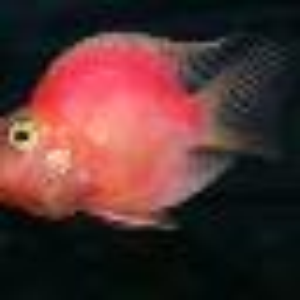

In [9]:
visualize = v2.Compose([v2.ToPILImage(), v2.Resize((300,300), antialias=False)])
image_per_class = dataset.load("train")
sample = visualize(image_per_class[500*0+10])
print(class_to_label[sample["label"]], sample["label"])
sample["image"]